# TITANIC MODEL

In [1]:
import numpy as np

## - Reading the dataset

In [2]:
import pandas as pd

In [3]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## - Creating the Model

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

### -- transforming the data into binary

In [6]:
def SexToBin(valor):
    if valor == 'female':
        return 1
    else:
        return 0
    
df_train['Sex_Bin'] = df_train['Sex'].map(SexToBin)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### -- selecting the variables

In [ ]:
# variables = ['Sex_Bin', 'Age']

In [ ]:
# X = df_train[variables]
# y = df_train['Survived']

In [ ]:
# X.head()

In [ ]:
# y.head()

In [ ]:
# X = X.fillna(-1)

## - Spliting

In [7]:
from sklearn.model_selection import train_test_split

In [ ]:
# np.random.seed(0)
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5)

# X_train.head()

In [ ]:
# X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

### -- fitting

In [ ]:
# model.fit(X, y)

In [ ]:
# model.fit(X_train, y_train)

## - Predicting

In [8]:
df_test['Sex_Bin'] = df_test['Sex'].map(SexToBin)

In [ ]:
# X_prev = df_test[variables]
# X_prev.head()

In [ ]:
# X_prev = X_prev.fillna(-1)
# Pred = model.predict(X_prev)
# Pred

In [ ]:
# p = model.predict(X_valid)

## - Validation

In [ ]:
# np.mean(y_valid == p)

In [ ]:
# p = (X_valid['Sex_Bin'] == 1).astype(np.int64)
# np.mean(y_valid == p)

### -- CrossValidation

In [9]:
from sklearn.model_selection import RepeatedKFold

In [ ]:
# results = []

# kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
# for line_train, line_valid in kf.split(X):
#     print('Train', line_train.shape[0])
#     print('Valid', line_valid.shape[0])

#     X_train, X_valid = X.iloc[line_train], X.iloc[line_valid]
#     y_train, y_valid = y.iloc[line_train], y.iloc[line_valid]
    
#     model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
#     model.fit(X_train, y_train)

#     pred = model.predict(X_valid)
#     acc = np.mean(y_valid == pred)

#     results.append(acc)
#     print('Accuracy:', acc)
#     print()
    
# print(X_train.head())
# print()

In [ ]:
# results

In [10]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# pylab.hist(results)

In [ ]:
# np.mean(results)

## - New variables

In [11]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [12]:
variables = ['Sex_Bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [13]:
X = df_train[variables].fillna(-1)
y = df_train['Survived']

In [20]:
results = []

kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for line_train, line_valid in kf.split(X):
    print('Train', line_train.shape[0])
    print('Valid', line_valid.shape[0])

    X_train, X_valid = X.iloc[line_train], X.iloc[line_valid]
    y_train, y_valid = y.iloc[line_train], y.iloc[line_valid]
    
    model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    model.fit(X_train, y_train)

    pred = model.predict(X_valid)
    acc = np.mean(y_valid == pred)

    results.append(acc)
    print('Accuracy:', acc)
    print()

Train 445
Valid 446
Accuracy: 0.7869955156950673

Train 446
Valid 445
Accuracy: 0.7797752808988764

Train 445
Valid 446
Accuracy: 0.827354260089686

Train 446
Valid 445
Accuracy: 0.8179775280898877

Train 445
Valid 446
Accuracy: 0.7847533632286996

Train 446
Valid 445
Accuracy: 0.7842696629213484

Train 445
Valid 446
Accuracy: 0.8161434977578476

Train 446
Valid 445
Accuracy: 0.7842696629213484

Train 445
Valid 446
Accuracy: 0.8004484304932735

Train 446
Valid 445
Accuracy: 0.8

Train 445
Valid 446
Accuracy: 0.8183856502242153

Train 446
Valid 445
Accuracy: 0.802247191011236

Train 445
Valid 446
Accuracy: 0.8116591928251121

Train 446
Valid 445
Accuracy: 0.8067415730337079

Train 445
Valid 446
Accuracy: 0.820627802690583

Train 446
Valid 445
Accuracy: 0.7887640449438202

Train 445
Valid 446
Accuracy: 0.8385650224215246

Train 446
Valid 445
Accuracy: 0.8044943820224719

Train 445
Valid 446
Accuracy: 0.7982062780269058

Train 446
Valid 445
Accuracy: 0.8112359550561797



(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <a list of 10 Patch objects>)

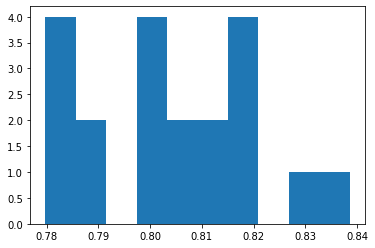

In [21]:
pylab.hist(results)

In [16]:
np.mean(results)

0.8041457147175896

## - Retrain

In [17]:
X.head(2)

,Sex_Bin,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833


In [18]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [19]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(X, y)

p = model.predict(df_test[variables].fillna(-1))

## Error Valid

In [22]:
X_valid_check = df_train.iloc[line_valid].copy()
X_valid_check['pred'] = pred
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Bin,pred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [23]:
error = X_valid_check[X_valid_check['Survived'] != X_valid_check['pred']]
error = error[[	'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
               'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_Bin', 'Survived', 'pred']]
error.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Bin,Survived,pred
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,1,0
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1,1,0
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,1,0
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,1,0


In [24]:
woman = error[error['Sex'] == 'female']
man = error[error['Sex'] == 'male']

In [25]:
woman.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Bin,Survived,pred
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0,1
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,1,0,1
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,1,0,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,0,1
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1,0,1
419,420,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,1,0,1
357,358,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S,1,0,1
254,255,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,1,0,1
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,1,0,1
654,655,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,1,0,1


### -- + new variables

In [26]:
df_train['Embarked_S'] = (df_train['Embarked'] == 'S').astype(int)
df_train['Embarked_C'] = (df_train['Embarked'] == 'C').astype(int)
# df_train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

df_train['Cabin_isnull'] = df_train['Cabin'].isnull().astype(int)

df_train['Name_Contains_Miss'] = df_train['Name'].str.contains("Miss").astype(int)
df_train['Name_Contains_Mrs'] = df_train['Name'].str.contains('Mrs').astype(int)

df_train['Name_Contains_Master'] = df_train['Name'].str.contains('Master').astype(int)
df_train['Name_Contains_Col'] = df_train['Name'].str.contains('Col').astype(int)
df_train['Name_Contains_Major'] = df_train['Name'].str.contains('Major').astype(int)
df_train['Name_Contains_Mr'] = df_train['Name'].str.contains('Mr').astype(int)

In [27]:
variables

['Sex_Bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [28]:
df_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_Bin,Embarked_S,Embarked_C,Cabin_isnull,Name_Contains_Miss,Name_Contains_Mrs,Name_Contains_Master,Name_Contains_Col,Name_Contains_Major,Name_Contains_Mr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,0,1,0,1,0,0,0,0,0,1


In [29]:
variables = ['Age','Pclass','SibSp','Parch','Sex_Bin','Embarked_S','Embarked_C','Cabin_isnull',
             'Name_Contains_Miss','Name_Contains_Mrs','Name_Contains_Master',
             'Name_Contains_Col','Name_Contains_Major','Name_Contains_Mr']

X = df_train[variables].fillna(-1)
y = df_train['Survived']

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
results2 = []

kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for line_train, line_valid in kf.split(X):
    print('Train', line_train.shape[0])
    print('Valid', line_valid.shape[0])

    X_train, X_valid = X.iloc[line_train], X.iloc[line_valid]
    y_train, y_valid = y.iloc[line_train], y.iloc[line_valid]
    
    # model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    model = LogisticRegression()
    
    model.fit(X_train, y_train)

    pred = model.predict(X_valid)
    acc = np.mean(y_valid == pred)

    results2.append(acc)
    print('Accuracy:', acc)
    print()

Train 445
Valid 446
Accuracy: 0.8251121076233184

Train 446
Valid 445
Accuracy: 0.8112359550561797

Train 445
Valid 446
Accuracy: 0.8161434977578476

Train 446
Valid 445
Accuracy: 0.8134831460674158

Train 445
Valid 446
Accuracy: 0.8183856502242153

Train 446
Valid 445
Accuracy: 0.8269662921348314

Train 445
Valid 446
Accuracy: 0.8161434977578476

Train 446
Valid 445
Accuracy: 0.8179775280898877

Train 445
Valid 446
Accuracy: 0.8228699551569507

Train 446
Valid 445
Accuracy: 0.8224719101123595

Train 445
Valid 446
Accuracy: 0.8340807174887892

Train 446
Valid 445
Accuracy: 0.8157303370786517

Train 445
Valid 446
Accuracy: 0.8408071748878924

Train 446
Valid 445
Accuracy: 0.8067415730337079

Train 445
Valid 446
Accuracy: 0.8139013452914798

Train 446
Valid 445
Accuracy: 0.8112359550561797

Train 445
Valid 446


C:\Users\lluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy: 0.8408071748878924

Train 446
Valid 445
Accuracy: 0.8157303370786517

Train 445
Valid 446
Accuracy: 0.8340807174887892

Train 446
Valid 445
Accuracy: 0.8224719101123595



C:\Users\lluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


((array([1., 3., 5., 2., 3., 2., 0., 0., 2., 2.]),
  array([0.80674157, 0.81014813, 0.81355469, 0.81696125, 0.82036781,
         0.82377437, 0.82718093, 0.83058749, 0.83399405, 0.83740061,
         0.84080717]),
  <a list of 10 Patch objects>),
 (array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
  array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
         0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
         0.83856502]),
  <a list of 10 Patch objects>))

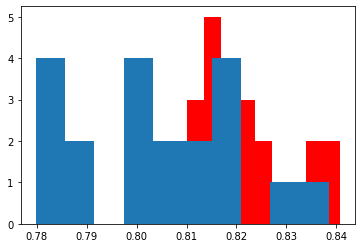

In [35]:
pylab.hist(results2, color = 'Red'), pylab.hist(results)

In [36]:
np.mean(results2)

0.8213188391192624

In [37]:
df_test['Embarked_S'] = (df_test['Embarked'] == 'S').astype(int)
df_test['Embarked_C'] = (df_test['Embarked'] == 'C').astype(int)
# df_train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

df_test['Cabin_isnull'] = df_test['Cabin'].isnull().astype(int)

df_test['Name_Contains_Miss'] =df_test['Name'].str.contains("Miss").astype(int)
df_test['Name_Contains_Mrs'] = df_test['Name'].str.contains('Mrs').astype(int)

df_test['Name_Contains_Master'] = df_test['Name'].str.contains('Master').astype(int)
df_test['Name_Contains_Col'] = df_test['Name'].str.contains('Col').astype(int)
df_test['Name_Contains_Major'] = df_test['Name'].str.contains('Major').astype(int)
df_test['Name_Contains_Mr'] = df_test['Name'].str.contains('Mr').astype(int)

# model = RandomForestClassifier(n_jobs=10, n_estimators=100, random_state=0)
model = RandomForestClassifier()

model.fit(X, y)

p = model.predict(df_test[variables].fillna(-1))

C:\Users\lluca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## - Exporting to CSV

In [38]:
sub = pd.Series(p, index = df_test['PassengerId'], name='Survived')
sub.shape

(418,)

In [39]:
sub.to_csv('LogisticModel2.csv', header=True)

FirstModel = pd.read_csv('FirstModel.csv')
FirstModel.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
